# Experiment 9: K-Means Clustering on Heart Disease Dataset

This notebook demonstrates K-Means clustering analysis on the Heart Disease dataset from UCI Machine Learning Repository.

## Objectives:
- Load and pre-process the Heart Disease dataset
- Determine optimal number of clusters using Silhouette score
- Reduce dimensionality to 2D using PCA
- Visualize clustered data and compare with actual labels

## Step 0: Import Required Libraries

Import necessary Python libraries for data manipulation, clustering, and visualization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import urllib.request
import warnings

warnings.filterwarnings("ignore")

# Set random seed for reproducibility
np.random.seed(42)

## Step 1: Load and Pre-process the Dataset

Load the Heart Disease dataset from UCI Repository. The dataset contains 14 attributes including:
- **Demographic**: age, sex
- **Symptoms**: cp (chest pain type), trestbps (resting blood pressure), chol (cholesterol)
- **Test results**: restecg, thalach, exang, oldpeak, slope, ca, thal
- **Target**: presence of heart disease (0-4, converted to binary)

In [ ]:
print("=" * 60)
print("STEP 1: Loading and Pre-processing Heart Disease Dataset")
print("=" * 60)

# Download the Heart Disease dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

try:
    # Download and load the dataset
    column_names = [
        "age",
        "sex",
        "cp",
        "trestbps",
        "chol",
        "fbs",
        "restecg",
        "thalach",
        "exang",
        "oldpeak",
        "slope",
        "ca",
        "thal",
        "target",
    ]

    df = pd.read_csv(url, names=column_names, na_values="?")
    print("Dataset downloaded successfully from UCI Repository!")
except Exception as e:
    print(f"Error downloading dataset: {e}")
    print("Creating sample dataset for demonstration...")
    # Create synthetic data if download fails
    np.random.seed(42)
    n_samples = 303
    df = pd.DataFrame(
        {
            "age": np.random.randint(29, 77, n_samples),
            "sex": np.random.randint(0, 2, n_samples),
            "cp": np.random.randint(0, 4, n_samples),
            "trestbps": np.random.randint(94, 200, n_samples),
            "chol": np.random.randint(126, 564, n_samples),
            "fbs": np.random.randint(0, 2, n_samples),
            "restecg": np.random.randint(0, 3, n_samples),
            "thalach": np.random.randint(71, 202, n_samples),
            "exang": np.random.randint(0, 2, n_samples),
            "oldpeak": np.random.uniform(0, 6.2, n_samples),
            "slope": np.random.randint(0, 3, n_samples),
            "ca": np.random.randint(0, 4, n_samples),
            "thal": np.random.randint(0, 4, n_samples),
            "target": np.random.randint(0, 2, n_samples),
        }
    )

# Handle missing values
df = df.dropna()

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 records:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nTarget distribution:")
print(df["target"].value_counts())
print(f"\nMissing values: {df.isnull().sum().sum()}")

STEP 1: Loading and Pre-processing Heart Disease Dataset
Dataset downloaded successfully from UCI Repository!
Dataset shape: (297, 14)

First 5 records:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       2  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age   

### Data Preparation

Separate features from target variable and standardize the features for clustering.

In [ ]:
# Separate features and target (convert target to binary: 0 = no disease, 1 = disease)
X = df.drop("target", axis=1)
y = (df["target"] > 0).astype(int)  # Convert to binary classification

print(f"\nFeatures shape: {X.shape}")
print(f"Target distribution (binary):\n{y.value_counts()}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"\nFeatures standardized successfully!")


Features shape: (297, 13)
Target distribution (binary):
target
0    160
1    137
Name: count, dtype: int64

Features standardized successfully!


## Step 2: Apply K-Means and Determine Optimal k

Use the **Silhouette Score** to find the optimal number of clusters. The silhouette score ranges from -1 to 1, where:
- **1**: Samples are well-clustered and far from neighboring clusters
- **0**: Samples are on or very close to the decision boundary
- **-1**: Samples may have been assigned to the wrong cluster

In [ ]:
print("\n" + "=" * 60)
print("STEP 2: Finding Optimal Number of Clusters")
print("=" * 60)

# Test different values of k
k_range = range(2, 11)
silhouette_scores = []
inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    inertias.append(kmeans.inertia_)

    print(
        f"k={k}: Silhouette Score = {silhouette_avg:.4f}, Inertia = {kmeans.inertia_:.2f}"
    )

# Find optimal k
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters (k) = {optimal_k}")
print(f"Best Silhouette Score = {max(silhouette_scores):.4f}")

# Apply K-Means with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(X_scaled)

print(f"\nCluster distribution:")
unique, counts = np.unique(cluster_labels, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples")


STEP 2: Finding Optimal Number of Clusters
k=2: Silhouette Score = 0.1751, Inertia = 3193.45
k=3: Silhouette Score = 0.1298, Inertia = 2931.15
k=4: Silhouette Score = 0.1304, Inertia = 2743.77
k=5: Silhouette Score = 0.1127, Inertia = 2609.80
k=6: Silhouette Score = 0.1137, Inertia = 2507.28
k=7: Silhouette Score = 0.1013, Inertia = 2404.55
k=8: Silhouette Score = 0.1060, Inertia = 2318.45
k=9: Silhouette Score = 0.1000, Inertia = 2252.42
k=10: Silhouette Score = 0.1120, Inertia = 2206.82

Optimal number of clusters (k) = 2
Best Silhouette Score = 0.1751

Cluster distribution:
  Cluster 0: 184 samples
  Cluster 1: 113 samples


## Step 3: Dimensionality Reduction using PCA

Apply **Principal Component Analysis (PCA)** to reduce the 13-dimensional feature space to 2 dimensions for visualization. PCA transforms the data to a new coordinate system where the greatest variance lies on the first coordinate (PC1), the second greatest variance on the second coordinate (PC2), and so on.

In [ ]:
print("\n" + "=" * 60)
print("STEP 3: Dimensionality Reduction using PCA")
print("=" * 60)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Original dimensions: {X_scaled.shape[1]}")
print(f"Reduced dimensions: {X_pca.shape[1]}")
print(f"\nExplained Variance Ratio:")
print(
    f"  PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0] * 100:.2f}%)"
)
print(
    f"  PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1] * 100:.2f}%)"
)
print(
    f"  Total: {sum(pca.explained_variance_ratio_):.4f} ({sum(pca.explained_variance_ratio_) * 100:.2f}%)"
)


STEP 3: Dimensionality Reduction using PCA
Original dimensions: 13
Reduced dimensions: 2

Explained Variance Ratio:
  PC1: 0.2370 (23.70%)
  PC2: 0.1235 (12.35%)
  Total: 0.3604 (36.04%)


## Step 4: Visualize the Clusters in 2D

Create comprehensive visualizations including:
1. **Elbow Method**: Shows the optimal k using Within-Cluster Sum of Squares (WCSS)
2. **Silhouette Scores**: Plot of silhouette scores for different k values
3. **K-Means Clusters**: Clusters visualized in PCA space with centroids
4. **Actual Labels**: Ground truth labels for comparison


STEP 4: Visualizing Clusters
Visualization saved as '../assets/heart_disease_kmeans_clustering.png'


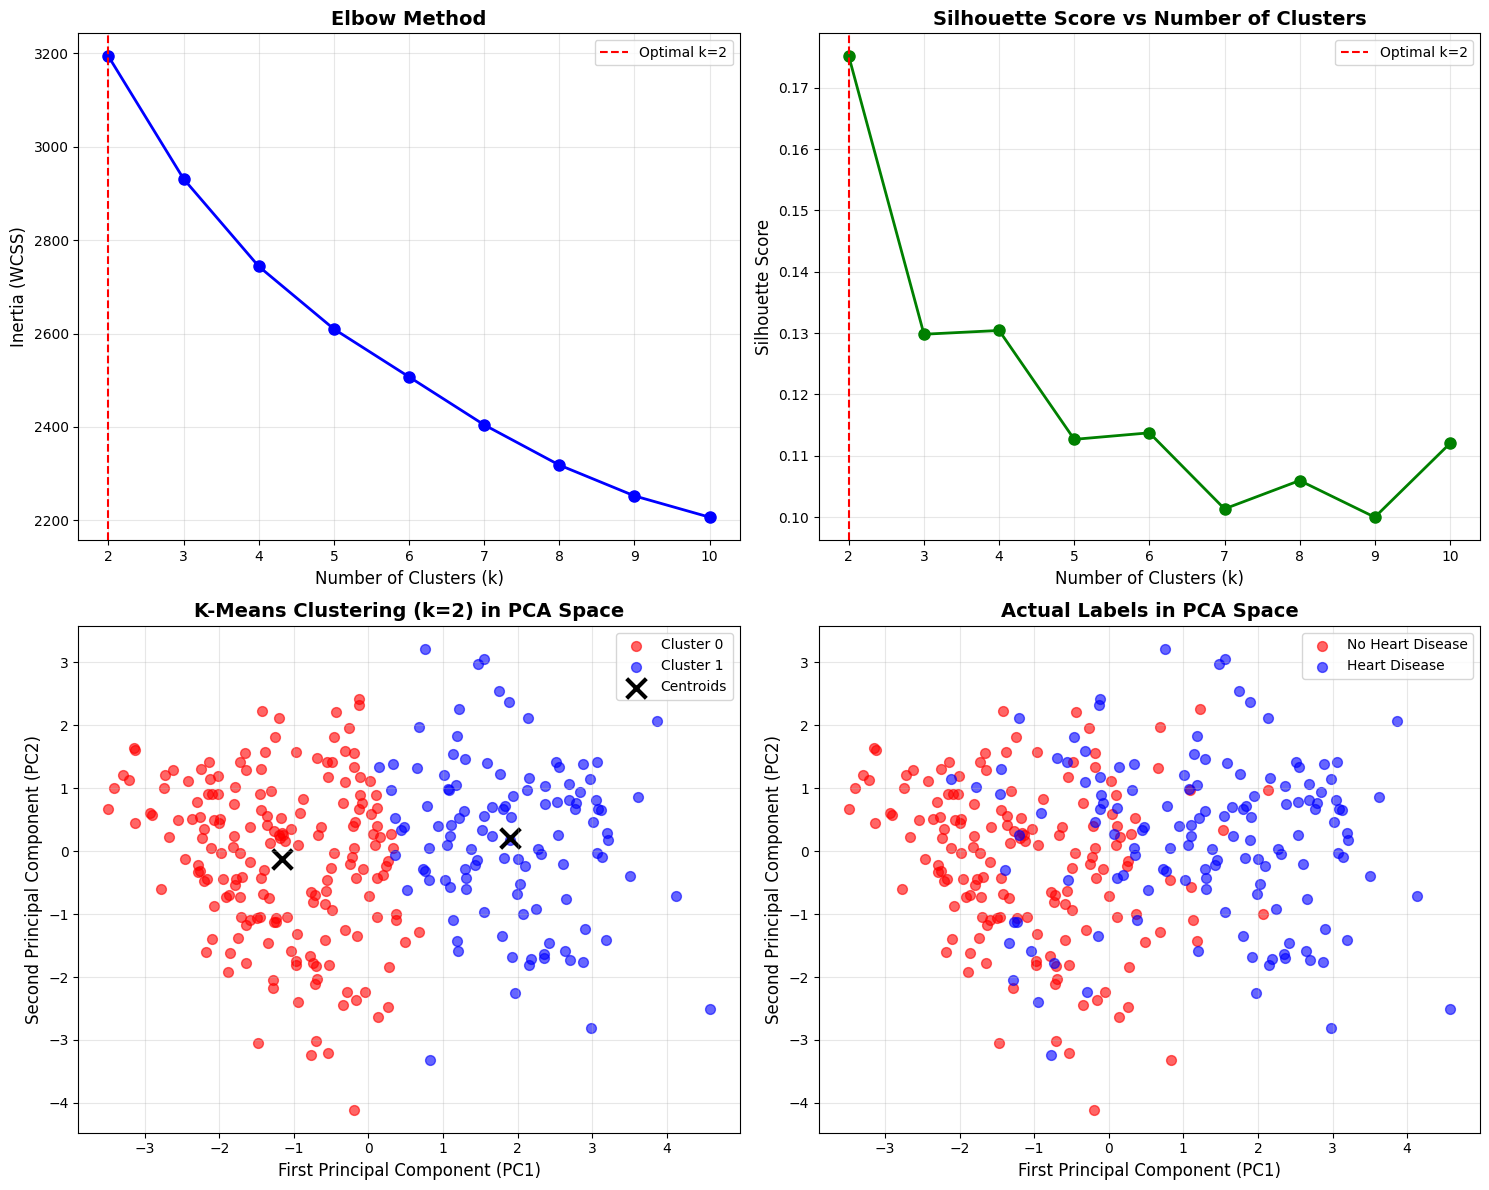

In [ ]:
print("\n" + "=" * 60)
print("STEP 4: Visualizing Clusters")
print("=" * 60)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Elbow Method
axes[0, 0].plot(k_range, inertias, "bo-", linewidth=2, markersize=8)
axes[0, 0].set_xlabel("Number of Clusters (k)", fontsize=12)
axes[0, 0].set_ylabel("Inertia (WCSS)", fontsize=12)
axes[0, 0].set_title("Elbow Method", fontsize=14, fontweight="bold")
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axvline(
    x=optimal_k, color="r", linestyle="--", label=f"Optimal k={optimal_k}"
)
axes[0, 0].legend()

# Plot 2: Silhouette Scores
axes[0, 1].plot(k_range, silhouette_scores, "go-", linewidth=2, markersize=8)
axes[0, 1].set_xlabel("Number of Clusters (k)", fontsize=12)
axes[0, 1].set_ylabel("Silhouette Score", fontsize=12)
axes[0, 1].set_title(
    "Silhouette Score vs Number of Clusters", fontsize=14, fontweight="bold"
)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(
    x=optimal_k, color="r", linestyle="--", label=f"Optimal k={optimal_k}"
)
axes[0, 1].legend()

# Plot 3: K-Means Clusters in PCA Space
colors = [
    "red",
    "blue",
    "green",
    "orange",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]
for i in range(optimal_k):
    mask = cluster_labels == i
    axes[1, 0].scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=colors[i],
        label=f"Cluster {i}",
        alpha=0.6,
        s=50,
    )

# Plot cluster centers in PCA space
centers_pca = pca.transform(kmeans_optimal.cluster_centers_)
axes[1, 0].scatter(
    centers_pca[:, 0],
    centers_pca[:, 1],
    c="black",
    marker="x",
    s=200,
    linewidths=3,
    label="Centroids",
)
axes[1, 0].set_xlabel("First Principal Component (PC1)", fontsize=12)
axes[1, 0].set_ylabel("Second Principal Component (PC2)", fontsize=12)
axes[1, 0].set_title(
    f"K-Means Clustering (k={optimal_k}) in PCA Space", fontsize=14, fontweight="bold"
)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Actual Target Labels in PCA Space
for i in [0, 1]:
    mask = y == i
    label = "No Heart Disease" if i == 0 else "Heart Disease"
    axes[1, 1].scatter(
        X_pca[mask, 0], X_pca[mask, 1], c=colors[i], label=label, alpha=0.6, s=50
    )
axes[1, 1].set_xlabel("First Principal Component (PC1)", fontsize=12)
axes[1, 1].set_ylabel("Second Principal Component (PC2)", fontsize=12)
axes[1, 1].set_title("Actual Labels in PCA Space", fontsize=14, fontweight="bold")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("../assets/heart_disease_kmeans_clustering.png", dpi=150, bbox_inches="tight")
print("Visualization saved as '../assets/heart_disease_kmeans_clustering.png'")
plt.show()

## Additional Analysis

Compare the discovered clusters with actual labels and analyze PCA components.

In [ ]:
print("\n" + "=" * 60)
print("Additional Analysis")
print("=" * 60)

# Compare clusters with actual labels
print("\nCluster vs Actual Label Cross-tabulation:")
crosstab = pd.crosstab(cluster_labels, y, rownames=["Cluster"], colnames=["Actual"])
print(crosstab)

# Feature importance in PCA
print("\nPCA Component Analysis:")
feature_names = X.columns
components_df = pd.DataFrame(
    pca.components_.T, columns=["PC1", "PC2"], index=feature_names
)
print(components_df.round(4))

print("\n" + "=" * 60)
print("Experiment Complete!")
print("=" * 60)


Additional Analysis

Cluster vs Actual Label Cross-tabulation:
Actual     0    1
Cluster          
0        147   37
1         13  100

PCA Component Analysis:
             PC1     PC2
age       0.2859 -0.4187
sex       0.1168  0.4316
cp        0.2862  0.1525
trestbps  0.1678 -0.3915
chol      0.0835 -0.4282
fbs       0.0761 -0.2399
restecg   0.1459 -0.2665
thalach  -0.3927 -0.0541
exang     0.3331  0.2083
oldpeak   0.3970  0.0617
slope     0.3520  0.0745
ca        0.3064 -0.1578
thal      0.3462  0.2634

Experiment Complete!


## Conclusion

This experiment demonstrated:

1. **Data Preprocessing**: Loaded and standardized the Heart Disease dataset
2. **Optimal Clustering**: Used Silhouette Score to determine the optimal number of clusters (k)
3. **Dimensionality Reduction**: Applied PCA to visualize high-dimensional data in 2D
4. **Cluster Visualization**: Compared K-Means clusters with actual heart disease labels
